In [2]:
from packages import *

In [3]:
data_path = '../DATA/Rhodamine/'
xlim = [690, 695]
T = 590
background = pd.read_csv(data_path + f'Rhodamine{T}_Bac.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])
reference = pd.read_csv(data_path + f'Rhodamine{T}_Ref.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])
signal = pd.read_csv(data_path + f'Rhodamine{T}_Sig.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])
background_noise = pd.read_csv(data_path + f'Rhodamine{T}_Bac_Noise.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])
reference_noise = pd.read_csv(data_path + f'Rhodamine{T}_Ref_Noise.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])
signal_noise = pd.read_csv(data_path + f'Rhodamine{T}_Sig_Noise.asc', skiprows=26, names=['Wavelength[nm]', 'Intensity[a.u.]'])


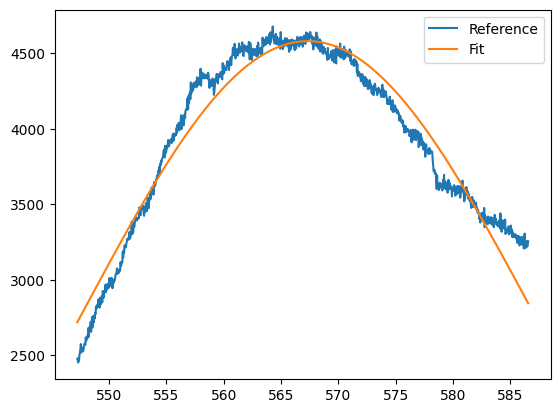

In [4]:
func = lambda x, cen, amp, wid: amp * np.exp(-(x - cen)**2 / wid)
p0 = [692, 4000, 10000]
x = reference['Wavelength[nm]']
y = reference['Intensity[a.u.]']
popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=p0)
plt.plot(x, y, label='Reference')
plt.plot(x, func(x, *popt), label='Fit')
plt.legend()

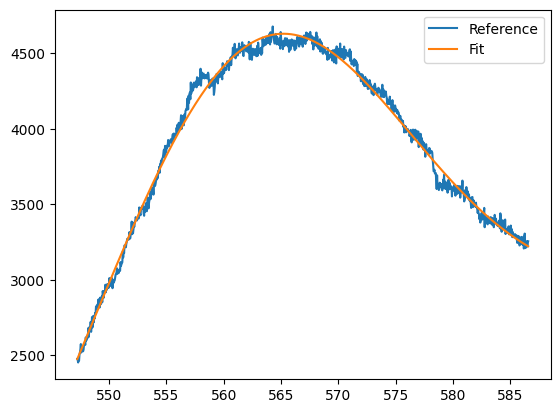

In [5]:
func = lambda x, cen1, amp1, wid1, cen2, amp2, wid2: amp1 * np.exp(-(x - cen1)**2 / wid1) + amp2 * np.exp(-(x - cen2)**2 / wid2)
p0 = [692, 4000, 10000, 694, 4000, 10000]
x = reference['Wavelength[nm]']
y = reference['Intensity[a.u.]']
popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=p0)
plt.plot(x, y, label='Reference')
plt.plot(x, func(x, *popt), label='Fit')
plt.legend()

[ 561.62486555 2946.99373998   16.33250361  579.58314104 2390.28184963
   25.88807601]


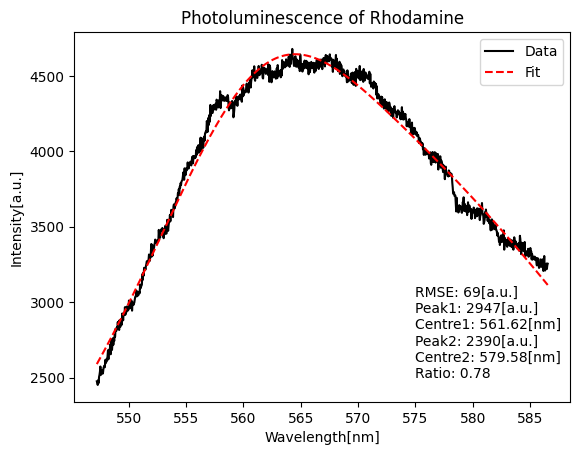

In [30]:
func = lambda x, cen1, amp1, wid1, cen2, amp2, wid2: amp1 / (((x - cen1)/wid1)**2+1) + amp2 / (((x - cen2)/wid2)**2+1)
p0 = [692, 4000, 100, 694, 4000, 100]
x = reference['Wavelength[nm]']
y = reference['Intensity[a.u.]']
popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=p0)
mid1, mid2 = popt[0], popt[3]; peak1, peak2 = popt[1], popt[4]; wid1, wid2 = popt[2], popt[5]
area1 = peak1 * wid1 * np.pi; area2 = peak2 * wid2 * np.pi
ratio = area1 / area2
loss = np.mean((y - func(x, *popt))**2)
plt.plot(x, y, label='Data', color='black')
plt.plot(x, func(x, *popt), label='Fit', color='red', linestyle='--')
plt.legend()
plt.title(f'Photoluminescence of Rhodamine')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Intensity[a.u.]')
plt.text(575, 2500, f"""RMSE: {np.sqrt(loss):.0f}[a.u.]
Peak1: {peak1:.0f}[a.u.]
Centre1: {mid1:.2f}[nm]
Peak2: {peak2:.0f}[a.u.]
Centre2: {mid2:.2f}[nm]
Ratio: {ratio:.2f}""")
print(popt)
plt.savefig('output/Rhodamine/Rhodamine.png', dpi=400)

[559.83333886  41.6778848   13.19815794 574.0355373   71.62374082
  25.53623867]


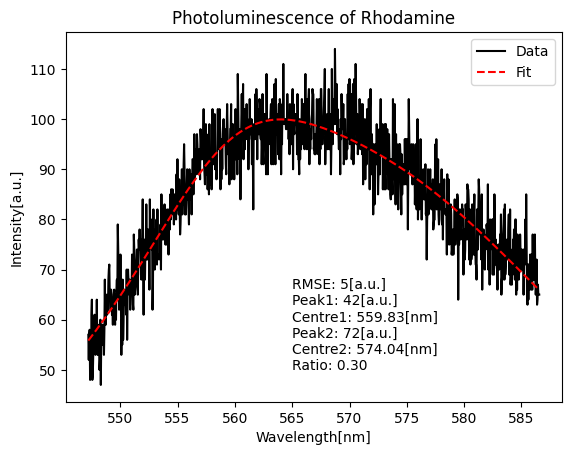

In [29]:
func = lambda x, cen1, amp1, wid1, cen2, amp2, wid2: amp1 / (((x - cen1)/wid1)**2+1) + amp2 / (((x - cen2)/wid2)**2+1)
p0 = [692, 100, 100, 694, 100, 100]
x = reference_noise['Wavelength[nm]']
y = reference_noise['Intensity[a.u.]']
popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=p0)
mid1, mid2 = popt[0], popt[3]; peak1, peak2 = popt[1], popt[4]; wid1, wid2 = popt[2], popt[5]
area1 = peak1 * wid1 * np.pi; area2 = peak2 * wid2 * np.pi
ratio = area1 / area2
loss = np.mean((y - func(x, *popt))**2)
plt.plot(x, y, label='Data', color='black')
plt.plot(x, func(x, *popt), label='Fit', color='red', linestyle='--')
plt.legend()
plt.title(f'Photoluminescence of Rhodamine')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Intensity[a.u.]')
plt.text(565, 50, f"""RMSE: {np.sqrt(loss):.0f}[a.u.]
Peak1: {peak1:.0f}[a.u.]
Centre1: {mid1:.2f}[nm]
Peak2: {peak2:.0f}[a.u.]
Centre2: {mid2:.2f}[nm]
Ratio: {ratio:.2f}""")
print(popt)
plt.savefig('output/Rhodamine/Rhodamine_Noise.png', dpi=400)

RMSE Error :  180.86691091831503
Peak1 : 1390.96, Centre1 : 385.84, Width1 : 38.92, Area1 : 17231.45
Peak2 : 4521.50, Centre2 : 568.21, Width2 : 25.93, Area2 : 6507522.22
Ratio : 0.00
R2 : 0.90


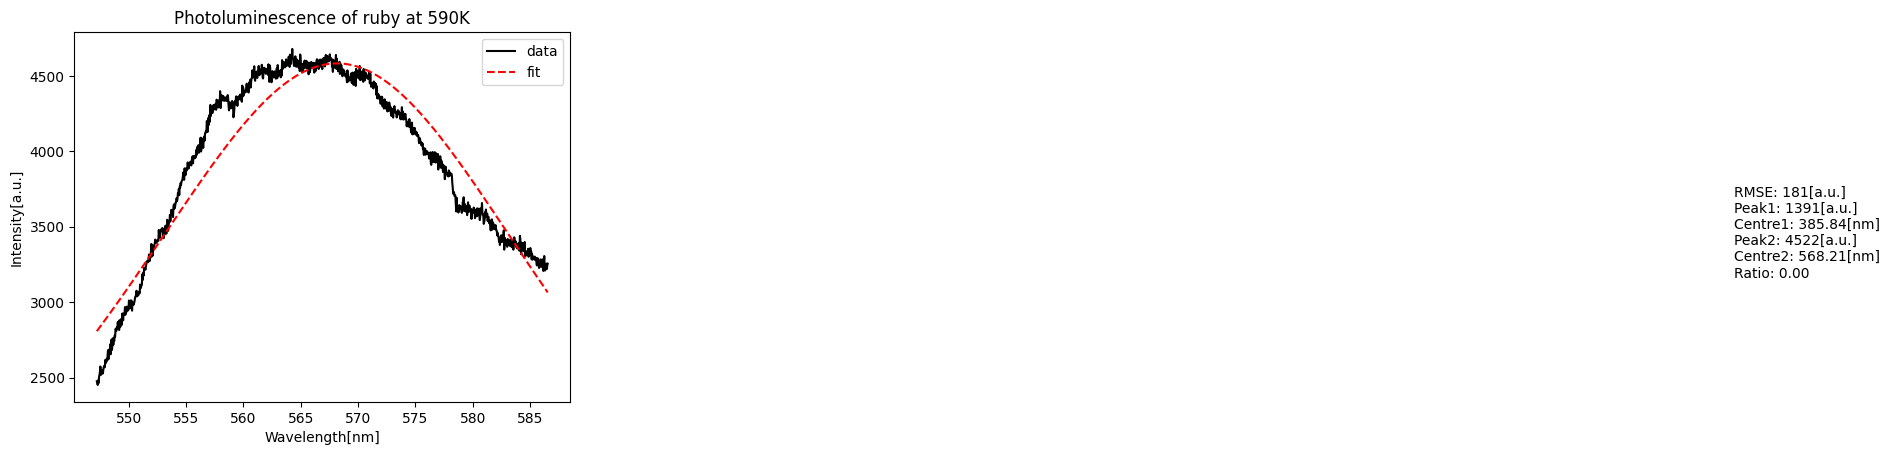

[590,
 array(1390.9626, dtype=float32),
 array(385.83908, dtype=float32),
 array(38.91852, dtype=float32),
 17231.454522164942,
 array(4521.5024, dtype=float32),
 array(568.21063, dtype=float32),
 array(25.932121, dtype=float32),
 6507522.220183237,
 0.0026479286492055564]

In [28]:
ref = reference
x = th.tensor(ref['Wavelength[nm]'].to_numpy())
y = th.tensor(ref['Intensity[a.u.]'].to_numpy(), dtype=th.float32)

# peak finding
range1 = [690, 692]; range2 = [692, 695]
A1 = 2900; x1 = 561; L1 = 1
A2 = 2400; x2 = 579; L2 = 1

# fitting
func = lambda x, A1, x1, L1, A2, x2, L2: A1 * L1**2 / (L1**2 + (x - x1)**2) + A2 * L2**2 / (L2**2 + (x - x2)**2)
p0 = th.tensor([A1, x1, L1*1e2, A2, x2, L2*1e2], requires_grad=True)
params = th.tensor([1, 1, 1e-2, 1, 1, 1e-2], requires_grad=True)

optimizer = th.optim.Adam([params], lr=5e-2, weight_decay=1e-5)

for epoch in range(1000):
  optimizer.zero_grad()
  loss = th.mean((func(x, *(p0*params)) - y)**2)
  loss.backward()
  optimizer.step()
print('RMSE Error : ', np.sqrt(loss.item()))
result = (params*p0)

peak1 = result[0].detach().numpy(); peak2 = result[3].detach().numpy()
mid1 = result[1].detach().numpy(); mid2 = result[4].detach().numpy()
width1 = result[2].detach().numpy(); width2 = result[5].detach().numpy()
area1 = result[0].detach().numpy()*result[2].detach().numpy() / np.pi; area2 = result[3].detach().numpy()*result[3].detach().numpy() / np.pi
ratio = area1 / area2
R2 = 1 - loss.item() / ((y - y.mean())**2).mean()

print(f'Peak1 : {peak1:.2f}, Centre1 : {mid1:.2f}, Width1 : {width1:.2f}, Area1 : {area1:.2f}')
print(f'Peak2 : {peak2:.2f}, Centre2 : {mid2:.2f}, Width2 : {width2:.2f}, Area2 : {area2:.2f}')
print(f'Ratio : {ratio:.2f}')
print(f'R2 : {R2:.2f}')
plt.plot(x, y, label='data', color='black')
plt.plot(x, func(x, *(p0*params).detach().numpy()), label='fit', color='red', linestyle='--')
plt.title(f'Photoluminescence of ruby at {T}K')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Intensity[a.u.]')
plt.text(690, peak2*0.7, f"""RMSE: {np.sqrt(loss.item()):.0f}[a.u.]
Peak1: {peak1:.0f}[a.u.]
Centre1: {mid1:.2f}[nm]
Peak2: {peak2:.0f}[a.u.]
Centre2: {mid2:.2f}[nm]
Ratio: {ratio:.2f}""")
plt.legend()
plt.show()
plt.close()
[T, peak1, mid1, width1, area1, peak2, mid2, width2, area2, ratio]

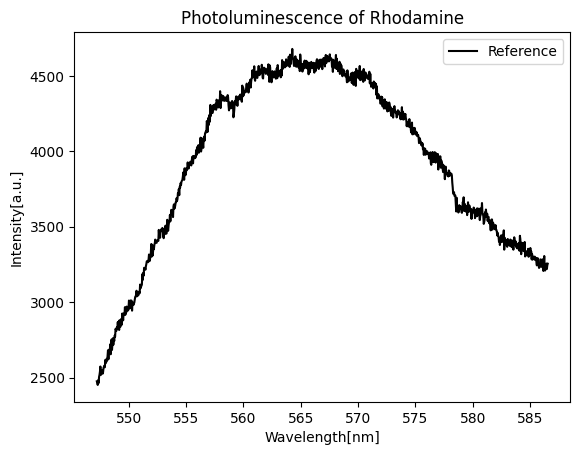

In [5]:
plt.title('Photoluminescence of Rhodamine')
plt.plot(reference['Wavelength[nm]'], reference['Intensity[a.u.]'], label='Reference', color='black')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Intensity[a.u.]')
plt.legend()
plt.show()

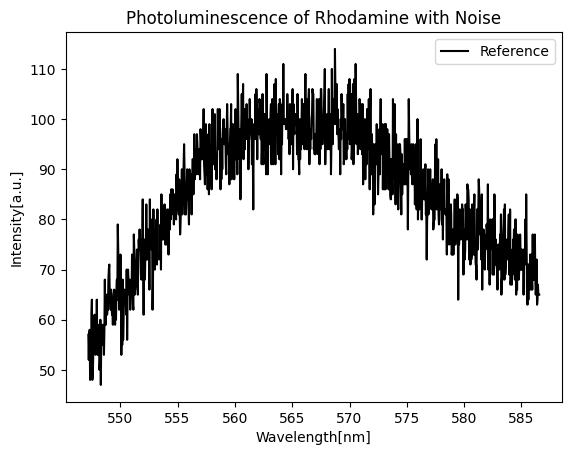

In [7]:
plt.title('Photoluminescence of Rhodamine with Noise')
plt.plot(reference_noise['Wavelength[nm]'], reference_noise['Intensity[a.u.]'], label='Reference', color='black')
plt.xlabel('Wavelength[nm]')
plt.ylabel('Intensity[a.u.]')
plt.legend()
plt.show()